# Random. Lazy functions. Algorithmic complexity.

## Random

Application:
* Simulation of experimental data (synthetic datasets) by selecting random parameters and adding noise.
* Generating random parameters when testing program code.
* Finding the maximum in multidimensional systems (e.g., parameter optimization in machine learning)
* Monte Carlo method


https://docs.python.org/3/library/random.html

The random library allows you to get a random number, as well as get a set of elements from an existing set.

Main functions:

    random(): generates a random number in the range [0.0 to 1.0)
  
    randint(a, b): returns a random integer from a specified range
    
    randrange(start, stop[, step]): returns a random number from a specified set of numbers
    
    shuffle(x): shuffles the list x
    
    choice(seq): returns a random element from the sequence seq
    
    sample(seq, k): returns a list of k elements of the sequence.


In [1]:
import random
 
number = random.random()  # random from 0.0 to 1.0
print(number)
number = random.random() 
print(number)

number = random.randint(10, 22)  # random from 10 to 22
print(number)

0.13073251511988804
0.2682623882824632
20


In [15]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8]
print(random.sample(numbers, 3))  

random.shuffle(numbers)
print(numbers)  

food = ['apple', 'water', 'bread', 'ice cream', 'tea', 'coffee']
print(random.choice(food))

[3, 8, 7]
[1, 4, 6, 7, 5, 8, 2, 3]
water


Each time the random function returns a different result, which can make debugging the program difficult.
To make the "random" sequence reproducible, you should use the seed function, passing it a fixed parameter: 
```python
random.seed(param).
```

Now the return values are reproduced.

In [18]:
random.seed(10) 
print(random.random())
print(random.random())

random.seed(10) 
print(random.random())
print(random.random())

0.5714025946899135
0.4288890546751146
0.5714025946899135
0.4288890546751146


#### Random numbers in NumPy

https://numpy.org/doc/stable/reference/random/index.html

It is easier to get a sequence of random numbers using the NumPy library.

But you can also get individual numbers. For example, in the range from 0 to 1:
```python
rng.random()
```

In [20]:
import numpy as np

rng = np.random.default_rng() # Construct a new Generator with the default BitGenerator (PCG64).
print(rng)

# Generate one random 64-bit float uniformly distributed over the range [0, 1)
print(rng.random())
print(rng.random())

Generator(PCG64)
0.9156672344911495
0.6295245613747817


1. Note that the object type is a generator (more about the generator below).

2. New numbers are generated each time.

To reproduce the "random" sequence (for example, for debugging), the seed parameter should be specified again.

In [19]:
#  two separate identical Generator objects, both with a seed value
rng1 = np.random.default_rng(seed=10)
print(rng1.random())
print(rng1.random())

rng2 = np.random.default_rng(seed=10)
print(rng2.random())
print(rng2.random())

0.9560017096289753
0.20768181007914688
0.9560017096289753
0.20768181007914688


To get a set of random integers in a certain range, the rng.integers() function is useful.

In [32]:
# Generate an array of 5 integers uniformly over the range [0, 10)
print(rng.integers(low=0, high=10, size=5))

[4 2 5 5 1]


To get an array filled with uniformly distributed random values in a certain range, you need to use the Generator.uniform function:

```python
random.Generator.uniform(low=0.0, high=1.0, size=None)
```
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html

This distribution is suitable for testing, for example.

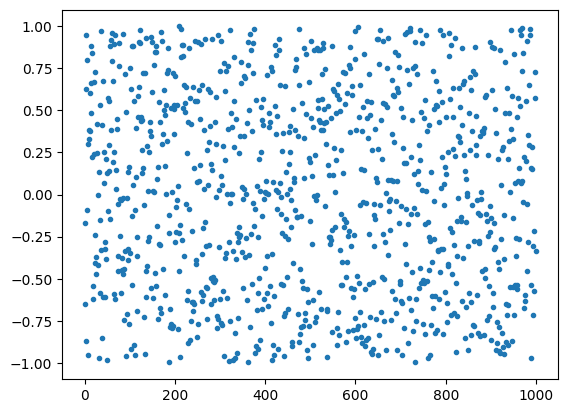

In [24]:
import matplotlib.pyplot as plt

rng = np.random.default_rng()

s = rng.uniform(-1,1,1000)

plt.plot(s, '.')
plt.show()

To obtain a normal distribution, another function is required:

```python
random.Generator.standard_normal(size=None, dtype=np.float64, out=None)
```
Draw samples from a standard Normal distribution (mean=0, stdev=1).

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html

This distribution is suitable for simulating noise, for example in modeling.

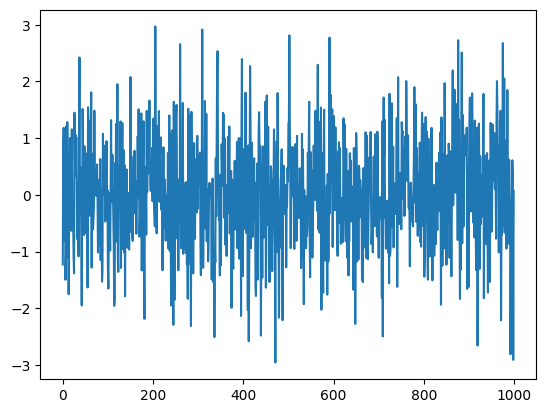

In [28]:
import matplotlib.pyplot as plt

rng = np.random.default_rng()

s = rng.standard_normal(1000)

plt.plot(s, '-')
plt.show()

## Lazy evaluation

Lazy - postponed until the moment when the data is really needed

(regular evaluation - so-called "eager evaluation")

### Enumerate vs range

Enumerate and iterate are "lazy" evaluation, range is "eager" evaluation.

Let's try to remove elements from the list simultaneously with the loop iterating over the values and see the difference in the result when using range and enumerate.

In [33]:
lst = [i for i in range(10)]

for i in range(len(lst)):    
    lst.pop()
    print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 2]
[0, 1]
[0]
[]


In [3]:
lst = [i for i in range(10)]

for i in lst:    
    lst.pop()
    print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]


In [4]:
lst = [i for i in range(10)]

for n,i in enumerate(lst):    
    lst.pop()
    print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]


The advantages of "lazy" iteration and enumerate:
* there is no need to create large objects in memory, 
* the ability to respond to changes in an object.

## Generator expressions vs. list comprehensions:
```python
a = 1000000000
eager = [i for i in range(a)]
lazy = (i for i in range(a))
```

Which method will start faster?eager or lazy?

https://stackoverflow.com/questions/47789/generator-expressions-vs-list-comprehensions

In [9]:
lst = [i**2 for i in range(8)]
print(lst)

[0, 1, 4, 9, 16, 25, 36, 49]


The generator only produces values when accessed via iterator or by calling the next() method.

Note that accessing after the end of the range (when the iterator has been exhausted) is not possible and causes an error.

In [5]:
lazy = (i**2 for i in range(8))
print(lazy)
print(next(lazy))
print(next(lazy))

print("Continue in the loop:")
for i in lazy:
    print(i)

print(next(lazy))

<generator object <genexpr> at 0x7f92d8171150>
0
1
Continue in the loop:
4
9
16
25
36
49


StopIteration: 

The generator can also be launched across the entire range if the object is unpacked (the asterisk * means that the object will be unpacked):

```python
print(*lazy)
```

In [7]:
lazy = (i**2 for i in range(8))
print(*lazy)

0 1 4 9 16 25 36 49


## Algorithmic complexity

Using list methods as an example:

https://antonz.ru/list-internals/

* Initialize an empty list l = [].
* Select an item from a list l[i] – O(1)
* Find the length of a list len(l) – O(1)
* Find a value in a list a in l - O(n)
* Add an item to a list l.append(a) – amortized О(1)
* Resize a list list_resize() – O(n) (sizes 0, 4, 8, 16, 25, 35, 46, 58, 72, 88...)
* Insert an item into a list l.insert() – O(n)
* Remove the last item from a list l.pop() – O(1)
* Remove an item from the middle l.remove() – O(n)
* Slice a list l[a:b] – O(a-b) (Slicing is just "copy part of the list" so time complexity is the same as copy)


https://wiki.python.org/moin/TimeComplexity


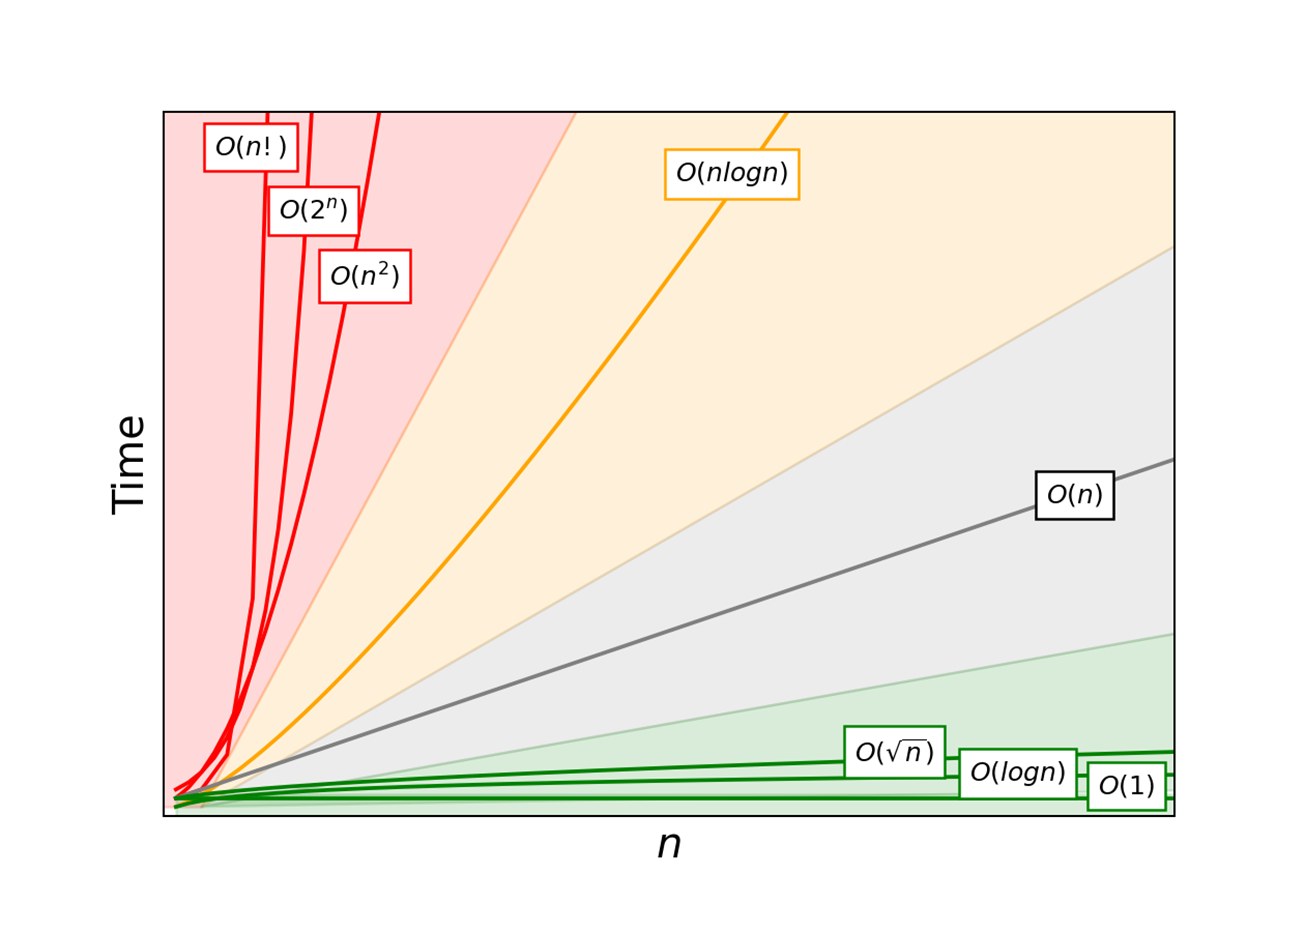

https://towardsdatascience.com/intro-to-data-structures-2615eadc343d

## Problem

Compare complexity of the iterative and recursive functions:

In [1]:
def factorial_iterative(n):
    if n < 0:
        print("n must not be negative")
        return
    factorial = 1
    for i in range (1, n + 1):
        factorial = factorial*i
    return factorial

def factorial_recursive(n):
    if n < 0:
        print("n must not be negative")
        return
    if n == 1:
        return n
    else:
        return n*factorial_recursive(n-1)

In [3]:
def fibonacci_it(n): 
    """ Returns Fibonacci Number at nth position using loop""" 
    if n == 0: 
        return 0 
    if n == 1: 
        return 1 
    i1 = 0 
    i2 = 1 
    num = 1 
    for x in range(1, n): 
        num = i1 + i2 
        i1 = i2 
        i2 = num 
    return num 

def fibonacci_rec(n): 
    """ Returns Fibonacci Number at nth position using recursion""" 
    if n == 0: 
        return 0 
    elif n == 1: 
        return 1 
    else: 
        return fibonacci_rec(n - 1) + fibonacci_rec(n - 2) 

## Sorting

https://www.geeksforgeeks.org/analysis-of-different-sorting-techniques/

https://afteracademy.com/blog/comparison-of-sorting-algorithms/

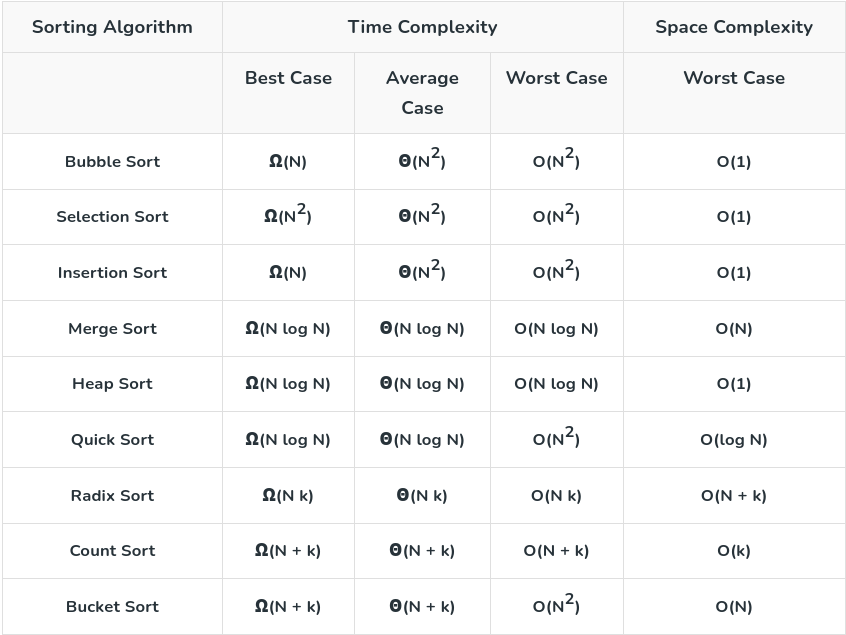


Animation: https://www.cs.usfca.edu/~galles/visualization/ComparisonSort.html

### Searching algorithms

https://www.geeksforgeeks.org/searching-algorithms/ (and some problems on searching)


    Linear Search
    Sentinel Linear Search
    Binary Search
    Meta Binary Search | One-Sided Binary Search
    Ternary Search
    Jump Search
    Interpolation Search
    Exponential Search
    Fibonacci Search
    The Ubiquitous Binary Search


#### Linear Search vs Binary Search
https://www.geeksforgeeks.org/linear-search-vs-binary-search/

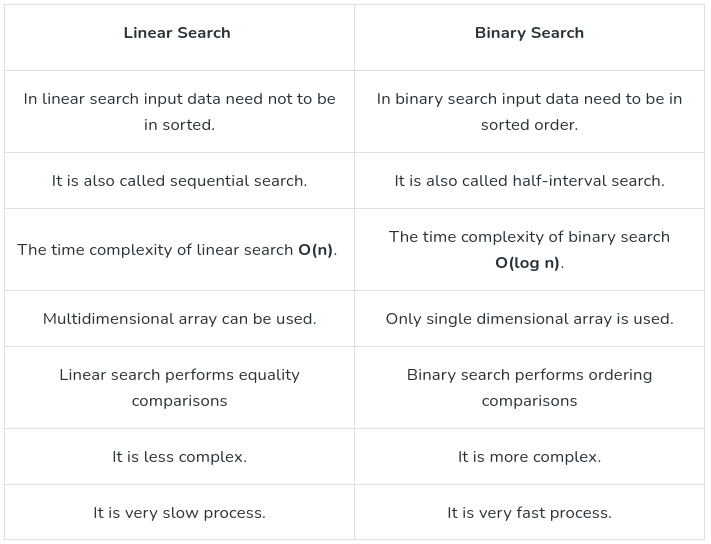

In [ ]:
# Linear Search in Python


def linearSearch(array, n, x):

	for i in range(0, n):
		if (array[i] == x):
			return i
	return -1

def binarySearch(array, x, low, high):

	# Repeat until the pointers low and high meet each other
	while low <= high:

		mid = low + (high - low)//2

		if array[mid] == x:
			return mid

		elif array[mid] < x:
			low = mid + 1

		else:
			high = mid - 1

	return -1






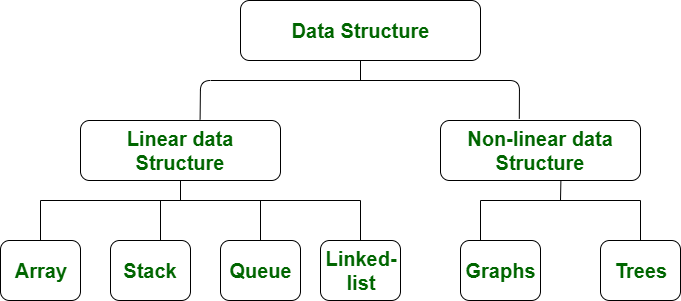

https://www.geeksforgeeks.org/difference-between-linear-and-non-linear-data-structures/

    Linear Data Structure: 
    Data structure where data elements are arranged sequentially or linearly where each and every element is attached to its previous and next adjacent is called a linear data structure. In linear data structure, single level is involved. Therefore, we can traverse all the elements in single run only. Linear data structures are easy to implement because computer memory is arranged in a linear way. Its examples are array, stack, queue, linked list, hash tables, etc.

    Non-linear Data Structure: 
    Data structures where data elements are not arranged sequentially or linearly are called non-linear data structures. In a non-linear data structure, single level is not involved. Therefore, we can’t traverse all the elements in single run only. Non-linear data structures are not easy to implement in comparison to linear data structure. It utilizes computer memory efficiently in comparison to a linear data structure. Its examples are trees and graphs.  

### Additional links:

https://www.geeksforgeeks.org/python-data-structures-and-algorithms/